In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background') #для сохранности глаз

### Ознакамливаемся

In [157]:
import chardet

with open('/content/drive/MyDrive/Colab Notebooks/Bank/МТС/MTS.txt', 'rb') as f:
    enc = chardet.detect(f.read())
    print(enc)
    
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank/МТС/MTS.txt', sep=';', encoding = enc['encoding'])

{'encoding': 'windows-1251', 'confidence': 0.8747323361893824, 'language': 'Russian'}


In [158]:
df.head(5)

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,Нет дефолта
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,Нет дефолта
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,Нет дефолта
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,Нет дефолта
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,Нет дефолта


In [159]:
# Количество уникальных значений в каждой фичи
pd.DataFrame(df.nunique(), columns = ['Количество']).T

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
Количество,12,205,22,66,2,6,22,2,3,76,3,5,2,2


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Месяц выдачи кредита        1723 non-null   int64 
 1   Сумма кредита               1723 non-null   int64 
 2   Срок кредита                1723 non-null   int64 
 3   Возраст клиента             1723 non-null   int64 
 4   Пол клиента                 1723 non-null   object
 5   Образование клиента         1723 non-null   object
 6   Тип товара                  1723 non-null   object
 7   Наличие детей у клиента     1723 non-null   object
 8   Регион выдачи кредита       1723 non-null   object
 9   Доход клиента               1723 non-null   int64 
 10  Семейное положение          1723 non-null   object
 11  Оператор связи              1723 non-null   object
 12  Является ли клиентом банка  1723 non-null   object
 13  Флаг дефолта по кредиту     1723 non-null   obje

In [161]:
df.describe()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,6.708067,29264.654672,11.546721,35.911782,32652.350551
std,3.538420,27926.778301,6.548354,13.120203,20913.193158
min,1.000000,5000.000000,3.000000,18.000000,1000.000000
25%,3.000000,13000.000000,6.000000,26.000000,21000.000000
50%,7.000000,21500.000000,12.000000,32.000000,27000.000000
75%,10.000000,34000.000000,12.000000,44.000000,38000.000000
max,12.000000,301000.000000,36.000000,90.000000,401000.000000


In [162]:
num_col = df.select_dtypes(np.number).columns.to_list()
cat_col = df.select_dtypes(object).columns.to_list()

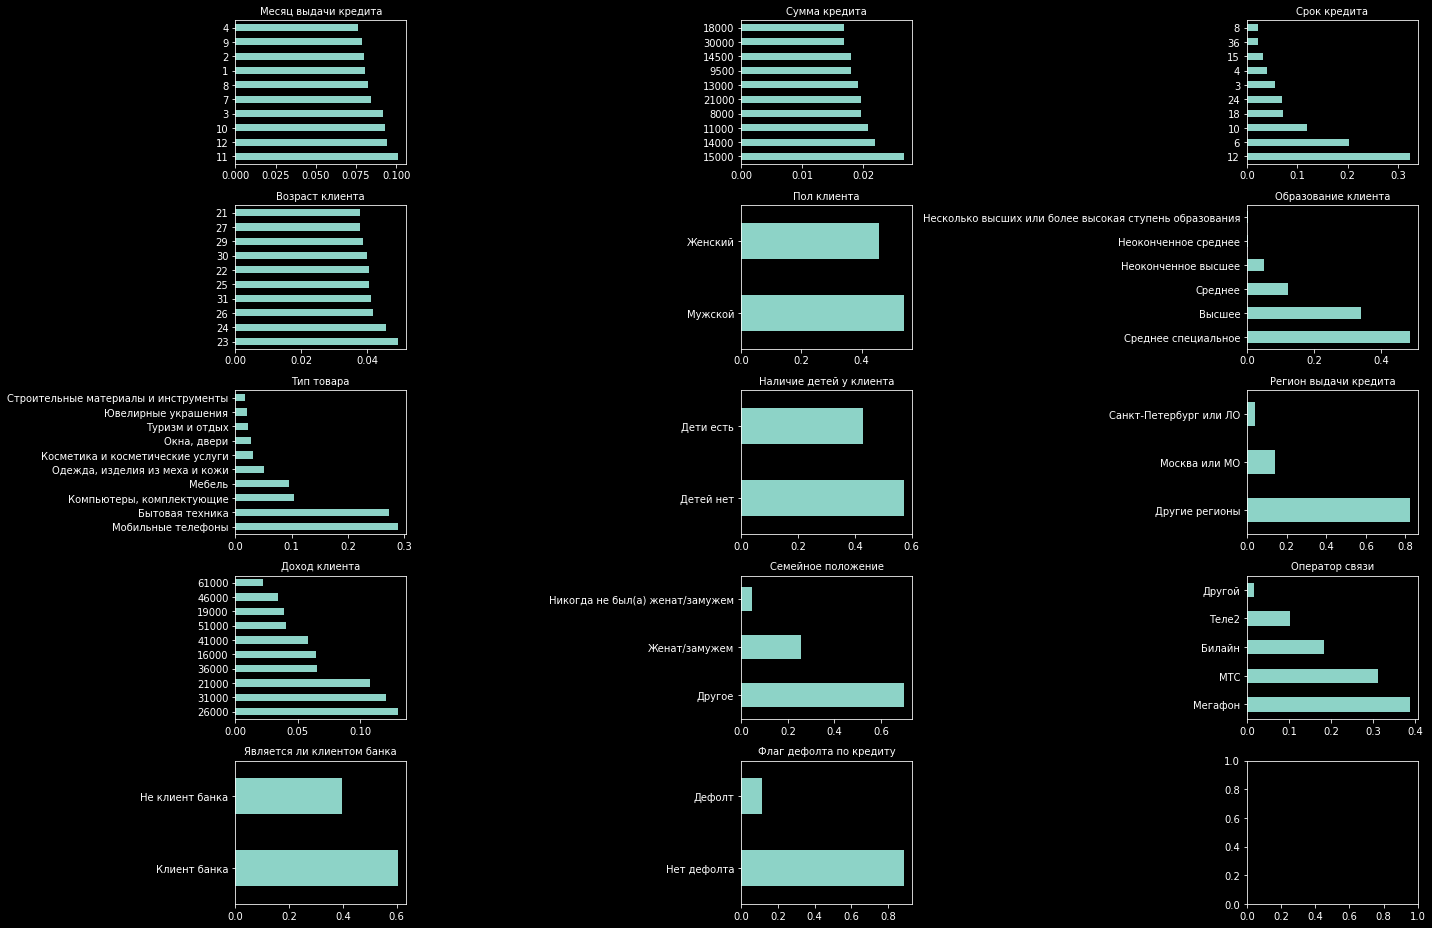

In [163]:
# смотрим доли зеачений в каждой фиче (топ 10)
n=3
name_columns = df.columns.to_list()
count_columns = len(name_columns)
row = round(count_columns/n)

fig, axes = plt.subplots(row, n, figsize=(20, 13))
ax = axes.ravel()

for i, c in enumerate(name_columns):
    df[c].value_counts(normalize=True).head(10).plot(kind='barh', ax=ax[i], fontsize=10)
    ax[i].set_title(c, fontsize = 10)

plt.tight_layout()
plt.show();

### Находим связи

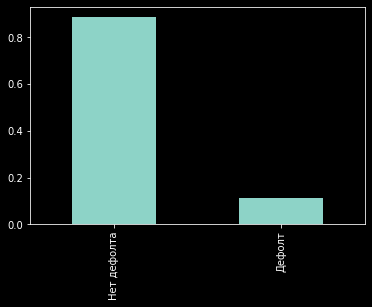

In [164]:
df['Флаг дефолта по кредиту'].value_counts(normalize=True).plot(kind='bar'); #несбалансированные классы

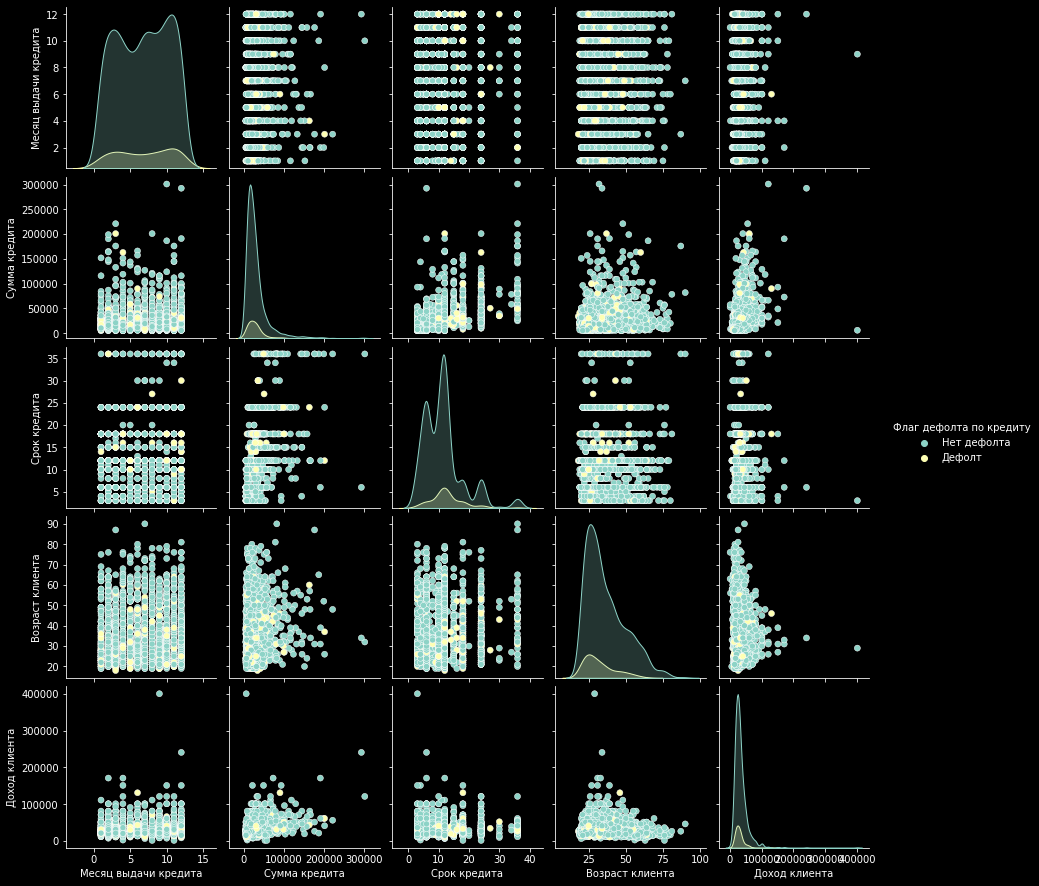

In [165]:
sns.pairplot(df, hue='Флаг дефолта по кредиту');

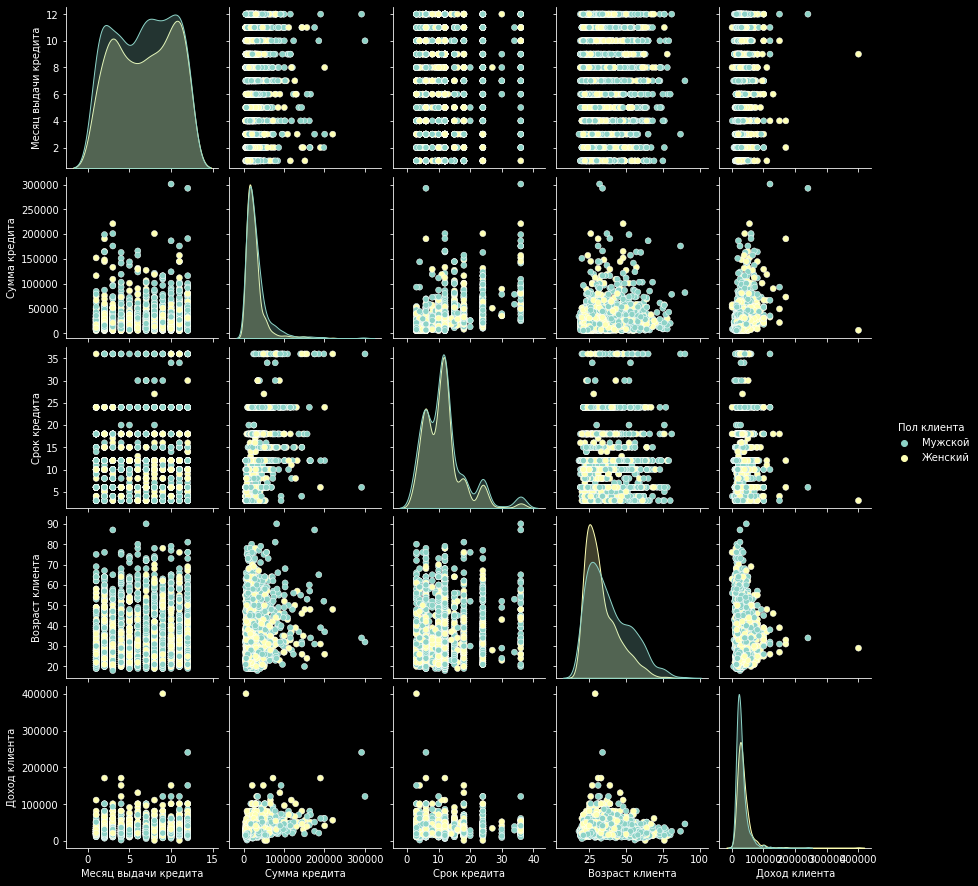

In [166]:
sns.pairplot(df, hue='Пол клиента');

In [167]:
df['Флаг дефолта по кредиту'] = df['Флаг дефолта по кредиту'].map({'Нет дефолта':0, 'Дефолт':1})

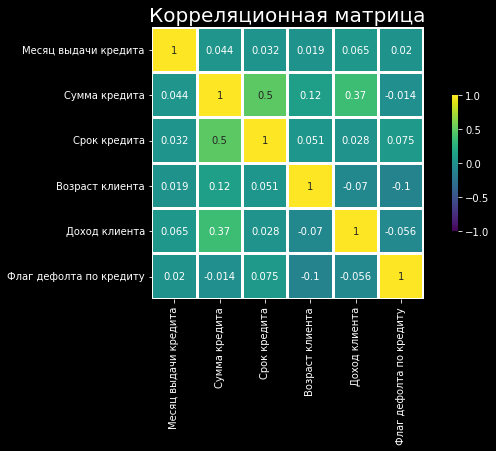

In [168]:
plt.subplots(figsize=(10, 5))
plt.title('Корреляционная матрица', fontsize = 20)
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'viridis', linewidths=2, square=True, center=0, cbar_kws={'shrink': .5});

In [169]:
df.corrwith(df['Флаг дефолта по кредиту']).to_frame().sort_values(0).rename(columns={0:'Корреляция с таргетом'})

,Корреляция с таргетом
Возраст клиента,-0.102110
Доход клиента,-0.056292
Сумма кредита,-0.014035
Месяц выдачи кредита,0.019749
Срок кредита,0.074508
Флаг дефолта по кредиту,1.000000


In [170]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [171]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['Месяц выдачи кредита', 'Сумма кредита', 'Срок кредита', 'Возраст клиента', 'Доход клиента', 'Флаг дефолта по кредиту']


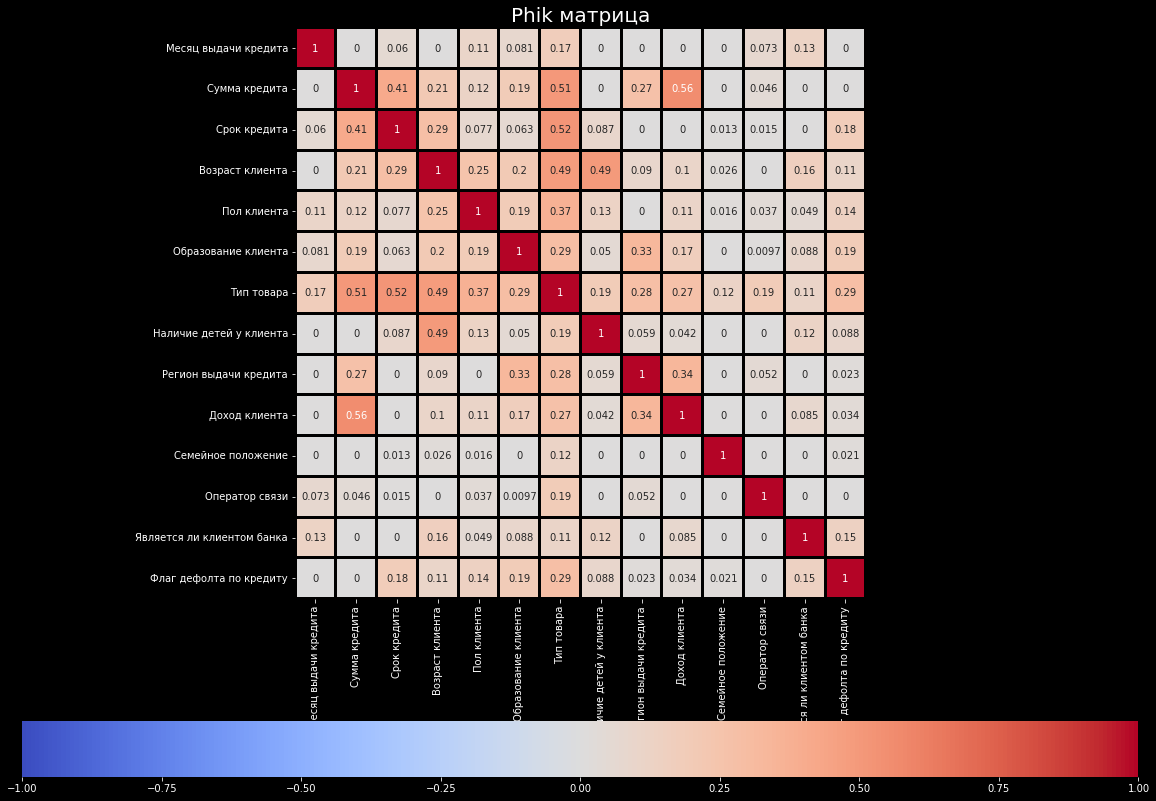

In [172]:
plt.subplots(figsize=(20, 15))
plt.title('Phik матрица', fontsize = 20)
sns.heatmap(phik_overview, vmin=-1, vmax=1, annot=True, cmap = 'coolwarm', linewidths=2, square=True, center=0, fmt='.2g',
            linecolor='black', cbar_kws= {'orientation': 'horizontal'});

In [173]:
phik_overview['Флаг дефолта по кредиту'].sort_values(ascending=False).to_frame()

,Флаг дефолта по кредиту
Флаг дефолта по кредиту,1.000000
Тип товара,0.285452
Образование клиента,0.194005
Срок кредита,0.183182
Является ли клиентом банка,0.147239
Пол клиента,0.140966
Возраст клиента,0.109181
Наличие детей у клиента,0.087549
Доход клиента,0.033898
Регион выдачи кредита,0.022923


### Проверка связей

**Тип товара**

In [174]:
df.groupby('Тип товара')['Флаг дефолта по кредиту'].agg(['count', 'mean']).sort_values('mean', ascending=False)
#при покупки мобильного телефона веротность дефолта наибольшая, по услугам строительства и ремона мало наблюдений

,count,mean
Тип товара,,
Строительные и ремонтные услуги,3,0.333333
Мобильные телефоны,498,0.226908
Ювелирные украшения,36,0.222222
Автомобильные товары,21,0.142857
Строительные материалы и инструменты,30,0.133333
"Мототехника (лодки, мото)",11,0.090909
Косметика и косметические услуги,55,0.090909
Бытовая техника,471,0.076433
Туризм и отдых,37,0.054054


**Образование клиента**

In [175]:
df.groupby('Образование клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean']).sort_values('mean', ascending=False)
#наибольшая вероятность дефолта у людей со средним/специальным образованием

,count,mean
Образование клиента,,
Среднее,208,0.192308
Среднее специальное,836,0.138756
Высшее,585,0.059829
Неоконченное высшее,86,0.058140
Неоконченное среднее,5,0.000000
Несколько высших или более высокая ступень образования,3,0.000000


**Срок кредита**

In [176]:
df.groupby('Срок кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean']).sort_values('count', ascending=False)

,count,mean
Срок кредита,,
12,557,0.152603
6,349,0.065903
10,207,0.091787
18,122,0.221311
24,121,0.099174
3,94,0.042553
4,67,0.059701
15,53,0.056604
36,37,0.081081


In [177]:
# df['Срок кредита bin'] = pd.qcut(df['Срок кредита'], 10, duplicates='drop')
df['Срок кредита bin'] = pd.cut(df['Срок кредита'], [-float('inf'), 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, float('inf')])
df.groupby('Срок кредита bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])
#наибольшая вероятность дефолта кредита от 15-18 месяцев

,count,mean
Срок кредита bin,,
"(-inf, 3.0]",94,0.042553
"(3.0, 6.0]",434,0.064516
"(6.0, 9.0]",58,0.086207
"(9.0, 12.0]",777,0.133848
"(12.0, 15.0]",58,0.103448
"(15.0, 18.0]",132,0.242424
"(18.0, 21.0]",3,0.000000
"(21.0, 24.0]",121,0.099174
"(24.0, 27.0]",1,1.000000


**Является ли клиентом банка**

In [178]:
df.groupby('Является ли клиентом банка')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Является ли клиентом банка,,
Клиент банка,1042,0.139155
Не клиент банка,681,0.074890


**Пол клиента**

In [179]:
df.groupby('Пол клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Пол клиента,,
Женский,792,0.146465
Мужской,931,0.085929


**Возраст клиента**

In [180]:
t = df.groupby('Возраст клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean']) #непонятно
t

,count,mean
Возраст клиента,,
18,1,1.000000
19,15,0.266667
20,44,0.136364
21,65,0.123077
22,70,0.185714
...,...,...
79,1,0.000000
80,1,0.000000
81,1,0.000000


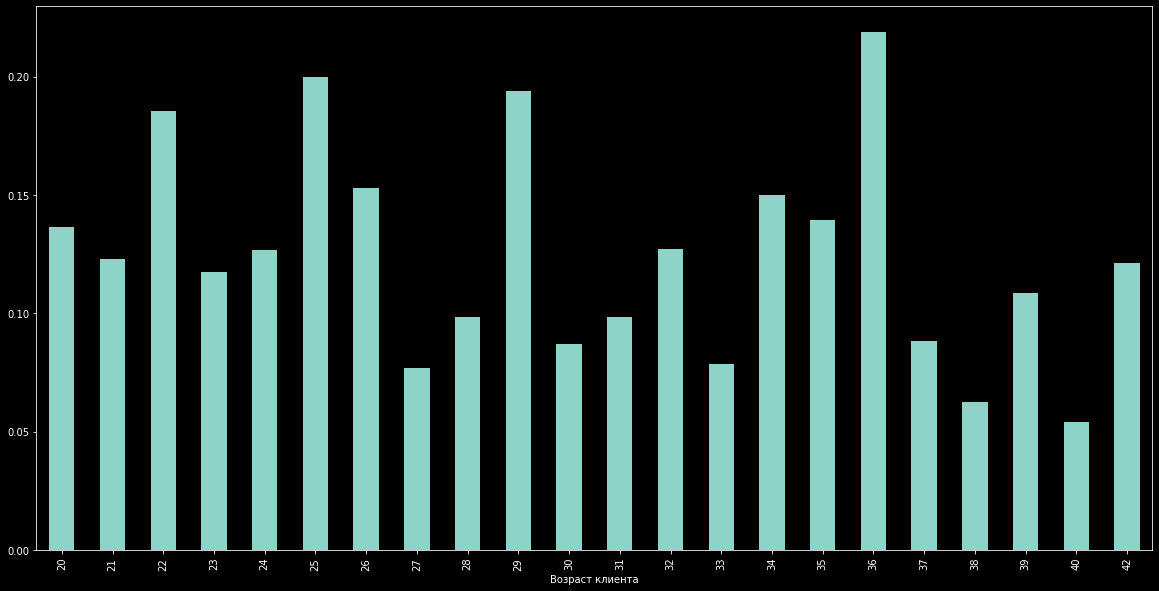

In [181]:
t[t['count']>30]['mean'].plot(kind='bar', figsize=(20,10));
#25, 29, 36 наибольшая вероятность дефолта, при условии что наблюдений более 30

In [182]:
# df['Возраст клиента bin'] = pd.qcut(df['Возраст клиента'], 10, duplicates='drop')
df['Возраст клиента bin'] = pd.cut(df['Возраст клиента'], [-float('inf'), 21, 24, 27, 30, 36, 40, 55, 56, float('inf')])
df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Возраст клиента bin,,
"(-inf, 21.0]",125,0.152000
"(21.0, 24.0]",234,0.141026
"(24.0, 27.0]",207,0.144928
"(27.0, 30.0]",197,0.126904
"(30.0, 36.0]",292,0.126712
"(36.0, 40.0]",149,0.080537
"(40.0, 55.0]",344,0.098837
"(55.0, 56.0]",18,0.055556
"(56.0, inf]",157,0.031847


**Наличие детей у клиента**

In [183]:
df.groupby('Наличие детей у клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Наличие детей у клиента,,
Детей нет,985,0.130964
Дети есть,738,0.090786


**Доход клиента**

In [184]:
t = df.groupby('Доход клиента')['Флаг дефолта по кредиту'].agg(['count', 'mean'])
t

,count,mean
Доход клиента,,
1000,2,0.0
2000,1,0.0
6000,1,0.0
7000,2,0.0
8000,3,0.0
...,...,...
131000,1,1.0
151000,3,0.0
171000,2,0.0


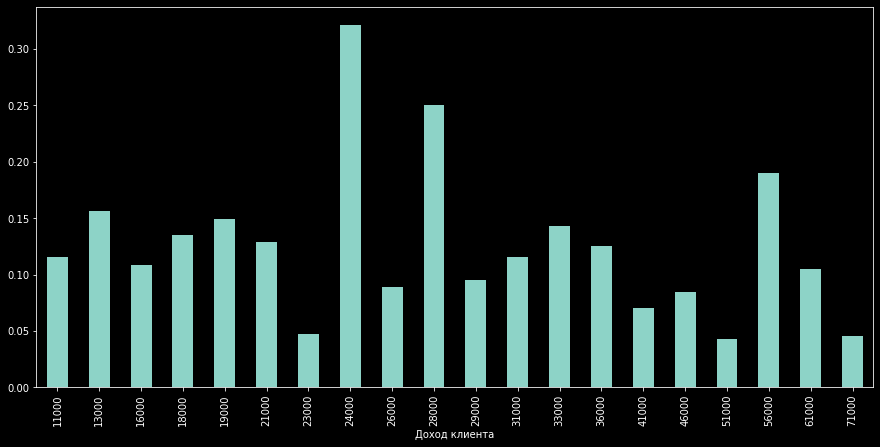

In [185]:
t[t['count']>20]['mean'].plot(kind='bar', figsize=(15,7));
#наибольшая вероятность дефолта у людей с доходом 24к

In [186]:
# df['Доход клиента bin'] = pd.qcut(df['Доход клиента'], 6, duplicates='drop')
df['Доход клиента bin'] = pd.cut(df['Доход клиента'], [-float('inf'), 25000, 50000, 75000, 100000, float('inf')])
df.groupby('Доход клиента bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Доход клиента bin,,
"(-inf, 25000.0]",625,0.129600
"(25000.0, 50000.0]",867,0.114187
"(50000.0, 75000.0]",172,0.087209
"(75000.0, 100000.0]",30,0.000000
"(100000.0, inf]",29,0.034483


**Регион выдачи кредита**

In [187]:
df.groupby('Регион выдачи кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Регион выдачи кредита,,
Другие регионы,1414,0.120934
Москва или МО,240,0.087500
Санкт-Петербург или ЛО,69,0.057971


**Семейное положение**

In [188]:
df.groupby('Семейное положение')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Семейное положение,,
Другое,1201,0.104080
Женат/замужем,444,0.139640
Никогда не был(а) женат/замужем,78,0.115385


**Месяц выдачи кредита**

In [189]:
t = df.groupby('Месяц выдачи кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean'])
t

,count,mean
Месяц выдачи кредита,,
1,139,0.136691
2,138,0.072464
3,158,0.139241
4,131,0.099237
5,116,0.112069
6,122,0.114754
7,145,0.062069
8,142,0.126761
9,136,0.095588


In [190]:
df['Времена года'] = pd.cut(df['Месяц выдачи кредита'], [-float('inf'), 3, 6, 9, float('inf')])
df.groupby('Времена года')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Времена года,,
"(-inf, 3.0]",435,0.117241
"(3.0, 6.0]",369,0.108401
"(6.0, 9.0]",423,0.094563
"(9.0, inf]",496,0.131048


In [191]:
# df['четный/нечетный месяц'] = [1 if i%2==0 else 0 for i in df['Месяц выдачи кредита']]
# df.groupby('четный/нечетный месяц')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

**Сумма кредита**

In [192]:
t = df.groupby('Сумма кредита')['Флаг дефолта по кредиту'].agg(['count', 'mean',])
t

,count,mean
Сумма кредита,,
5000,13,0.076923
5500,17,0.000000
6000,16,0.187500
6500,24,0.208333
7000,27,0.037037
...,...,...
199000,1,0.000000
201000,2,0.500000
221000,1,0.000000


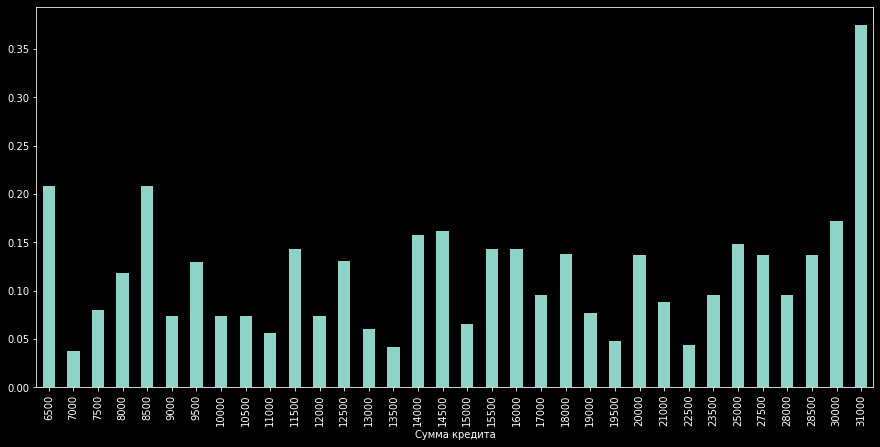

In [193]:
t[t['count'] > 20]['mean'].plot(kind='bar', figsize=(15,7));

In [194]:
df['Сумма кредита bin'] = pd.cut(df['Сумма кредита'], [-float('inf'), 15000, 30000, 45000, float('inf')])
df.groupby('Сумма кредита bin')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Сумма кредита bin,,
"(-inf, 15000.0]",571,0.101576
"(15000.0, 30000.0]",619,0.111470
"(30000.0, 45000.0]",286,0.157343
"(45000.0, inf]",247,0.097166


**Оператор связи**

In [195]:
df.groupby('Оператор связи')['Флаг дефолта по кредиту'].agg(['count', 'mean'])

,count,mean
Оператор связи,,
Билайн,317,0.088328
Другой,27,0.111111
МТС,536,0.123134
Мегафон,666,0.121622
Теле2,177,0.101695


### Кодируем категориальные фичи, генерируем новые основываясь на проверенных связях.

In [196]:
df.head(5)

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту,Срок кредита bin,Возраст клиента bin,Доход клиента bin,Времена года,Сумма кредита bin
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,0,"(9.0, 12.0]","(36.0, 40.0]","(-inf, 25000.0]","(-inf, 3.0]","(-inf, 15000.0]"
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,0,"(3.0, 6.0]","(-inf, 21.0]","(-inf, 25000.0]","(-inf, 3.0]","(15000.0, 30000.0]"
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,0,"(9.0, 12.0]","(21.0, 24.0]","(25000.0, 50000.0]","(-inf, 3.0]","(15000.0, 30000.0]"
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,0,"(9.0, 12.0]","(27.0, 30.0]","(25000.0, 50000.0]","(-inf, 3.0]","(-inf, 15000.0]"
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,0,"(9.0, 12.0]","(24.0, 27.0]","(25000.0, 50000.0]","(-inf, 3.0]","(-inf, 15000.0]"


In [197]:
# кодирем вероятностью принадлежности к 1 классу (дефолт)
df['Месяц выдачи кредита Р'] = df['Месяц выдачи кредита'].map(df.groupby('Месяц выдачи кредита')['Флаг дефолта по кредиту'].mean().to_dict())
df['Тип товара Р'] = df['Тип товара'].map(df.groupby('Тип товара')['Флаг дефолта по кредиту'].mean().to_dict())
df['Образование клиента Р'] = df['Образование клиента'].map(df.groupby('Образование клиента')['Флаг дефолта по кредиту'].mean().to_dict())
df['Срок кредита Р'] = df['Срок кредита'].map(df.groupby('Срок кредита')['Флаг дефолта по кредиту'].mean().to_dict())
df['Является ли клиентом банка Р'] = df['Является ли клиентом банка'].map(df.groupby('Является ли клиентом банка')['Флаг дефолта по кредиту'].mean().to_dict())
df['Пол клиента Р'] = df['Пол клиента'].map(df.groupby('Пол клиента')['Флаг дефолта по кредиту'].mean().to_dict())
df['Наличие детей у клиента Р'] = df['Наличие детей у клиента'].map(df.groupby('Наличие детей у клиента')['Флаг дефолта по кредиту'].mean().to_dict())
df['Регион выдачи кредита Р'] = df['Регион выдачи кредита'].map(df.groupby('Регион выдачи кредита')['Флаг дефолта по кредиту'].mean().to_dict())
df['Семейное положение Р'] = df['Семейное положение'].map(df.groupby('Семейное положение')['Флаг дефолта по кредиту'].mean().to_dict())
df['Оператор связи Р'] = df['Оператор связи'].map(df.groupby('Оператор связи')['Флаг дефолта по кредиту'].mean().to_dict())
df['Срок кредита bin Р'] = df['Срок кредита bin'].map(df.groupby('Срок кредита bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Возраст клиента bin Р'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Доход клиента bin Р'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Времена года Р'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)
df['Сумма кредита bin Р'] = df['Возраст клиента bin'].map(df.groupby('Возраст клиента bin')['Флаг дефолта по кредиту'].mean().to_dict()).astype(float)

In [198]:
df.info() #astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Месяц выдачи кредита          1723 non-null   int64   
 1   Сумма кредита                 1723 non-null   int64   
 2   Срок кредита                  1723 non-null   int64   
 3   Возраст клиента               1723 non-null   int64   
 4   Пол клиента                   1723 non-null   object  
 5   Образование клиента           1723 non-null   object  
 6   Тип товара                    1723 non-null   object  
 7   Наличие детей у клиента       1723 non-null   object  
 8   Регион выдачи кредита         1723 non-null   object  
 9   Доход клиента                 1723 non-null   int64   
 10  Семейное положение            1723 non-null   object  
 11  Оператор связи                1723 non-null   object  
 12  Является ли клиентом банка    1723 non-null   ob

In [199]:
df['Ежемесячный патеж'] = df['Сумма кредита'] / df['Срок кредита']
df['Зарплата/Возраст'] = df['Доход клиента'] / df['Возраст клиента']
df['Сколько остается на жизнь'] = df['Доход клиента'] - df['Ежемесячный патеж']

In [200]:
df['Пол клиента'] = df['Пол клиента'].map({'Мужской':1, 'Женский':0})
df['Наличие детей у клиента'] = df['Наличие детей у клиента'].map({'Детей нет':1, 'Дети есть':0})
df['Является ли клиентом банка'] = df['Является ли клиентом банка'].map({'Клиент банка':1, 'Не клиент банка':0})

In [201]:
df = pd.get_dummies(data=df, columns=['Месяц выдачи кредита', 'Образование клиента', 'Тип товара', 'Регион выдачи кредита', 'Семейное положение', 'Оператор связи',
                                      'Срок кредита bin', 'Возраст клиента bin', 'Доход клиента bin', 'Времена года', 'Сумма кредита bin'])

### Логарифмирование, проверка на нормальное распределение (QQ plot)

In [50]:
import pylab 
import scipy.stats as stats

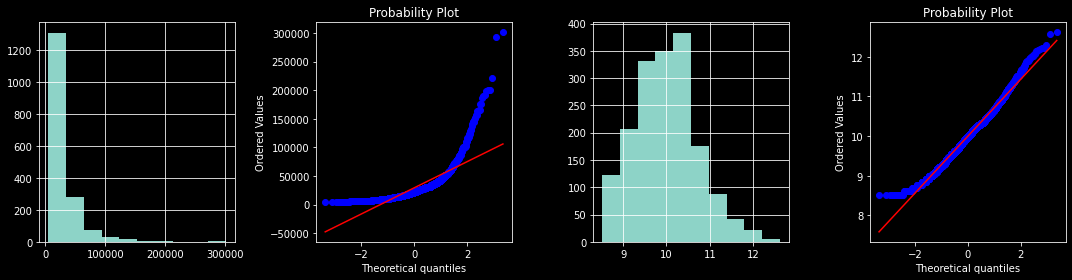

In [51]:
df['Сумма кредита log'] = np.log(df['Сумма кредита'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Сумма кредита'].hist(ax=axes[0])
stats.probplot(df['Сумма кредита'], dist="norm", plot=axes[1])
df['Сумма кредита log'].hist(ax=axes[2])
stats.probplot(df['Сумма кредита log'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

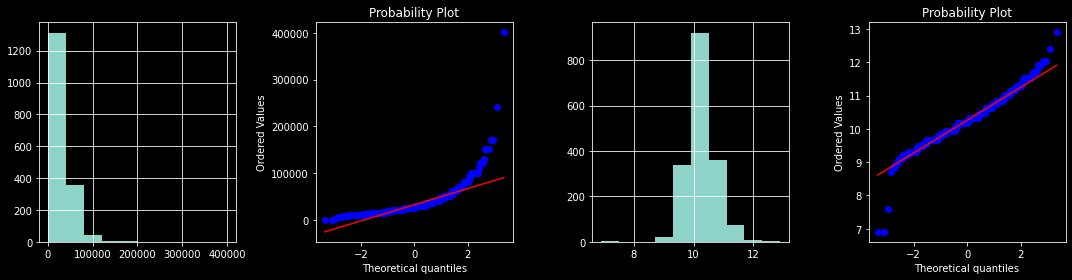

In [52]:
df['Доход клиента log'] = np.log(df['Доход клиента'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Доход клиента'].hist(ax=axes[0])
stats.probplot(df['Доход клиента'], dist="norm", plot=axes[1])
df['Доход клиента log'].hist(ax=axes[2])
stats.probplot(df['Доход клиента log'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

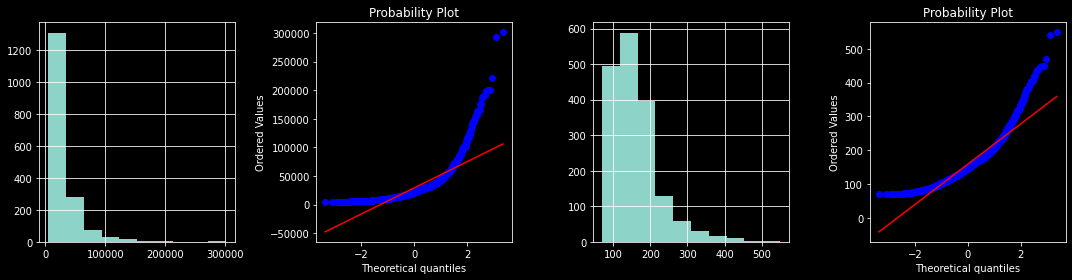

In [53]:
df['Сумма кредита sqrt'] = np.sqrt(df['Сумма кредита'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Сумма кредита'].hist(ax=axes[0])
stats.probplot(df['Сумма кредита'], dist="norm", plot=axes[1])
df['Сумма кредита sqrt'].hist(ax=axes[2])
stats.probplot(df['Сумма кредита sqrt'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

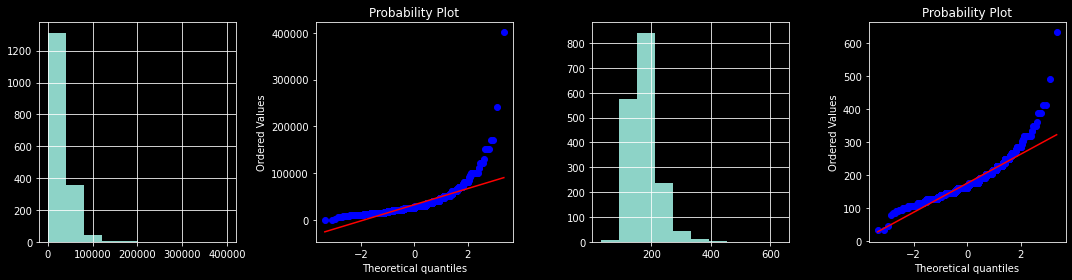

In [54]:
df['Доход клиента sqrt'] = np.sqrt(df['Доход клиента'])

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

df['Доход клиента'].hist(ax=axes[0])
stats.probplot(df['Доход клиента'], dist="norm", plot=axes[1])
df['Доход клиента sqrt'].hist(ax=axes[2])
stats.probplot(df['Доход клиента sqrt'], dist="norm", plot=axes[3])

plt.tight_layout()
plt.show();

Логорифмирование лучше

### Кластеризация, понижение размерности
использую как фичу

In [55]:
import umap.umap_ as umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score

In [56]:
num_col.remove('Месяц выдачи кредита')
df_clister = df[num_col].copy()
# df_clister = df.copy()

In [57]:
pca = PCA(n_components=2) 
tsne = TSNE(n_components=2, perplexity=50)
umap = umap.UMAP(n_components=2, n_neighbors=50)

X = RobustScaler().fit_transform(df_clister)

X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
X_umap = umap.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


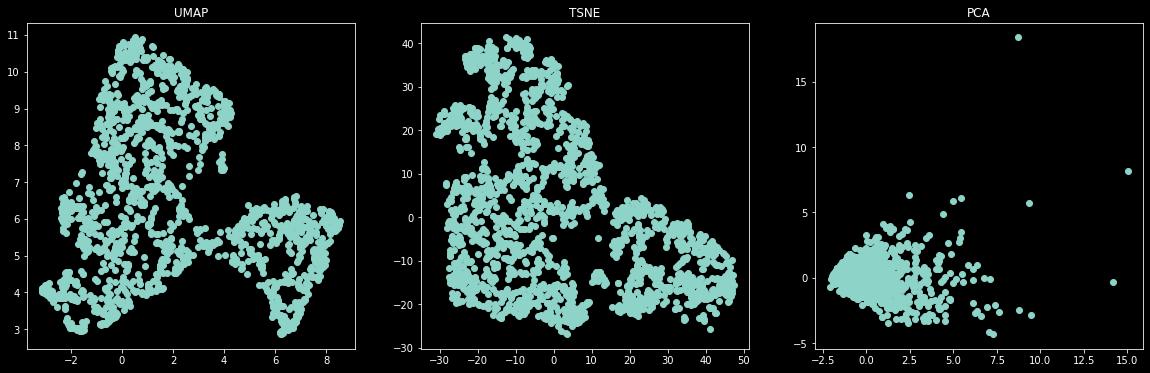

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
ax1.scatter(X_umap[:, 0], X_umap[:, 1])
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax3.scatter(X_pca[:, 0], X_pca[:, 1])
ax1.set_title('UMAP')
ax2.set_title('TSNE')
ax3.set_title('PCA');

In [59]:
X = {'pca'  : X_pca, 'tsne' : X_tsne, 'umap' : X_umap}
models = {'KMeans' : KMeans(2), 'AggCls' : AgglomerativeClustering(2), 'DBSCAN' : DBSCAN(eps=0.1, min_samples=2)}

def plot_results(X: dict, models: dict):
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    for i in np.arange(3):
        for j in np.arange(3):
            X_ = list(X.values())[i]
            model = list(models.values())[j].fit(X_)
            colors = model.labels_
            sil_score = silhouette_score(X_, model.labels_)         
            ax[i, j].scatter(X_[:, 0], X_[:, 1], c=colors, cmap='viridis', marker='.', s=10)
            ax[i, j].set_title(f'{list(X.keys())[i]}/{list(models.keys())[j]}: sil_score={sil_score:.3f}')

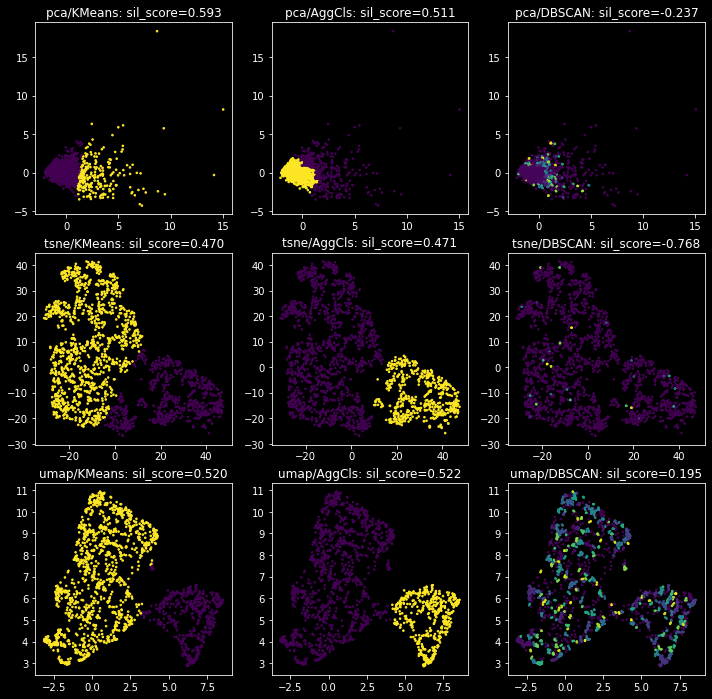

In [60]:
plot_results(X, models)

In [61]:
# ag = DBSCAN(eps=0.1, min_samples=2)
ag = KMeans(2)
ag_umap = ag.fit_predict(X_umap)
ag_tsne = ag.fit_predict(X_tsne)
ag_pca = ag.fit_predict(X_pca)

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
# ax1 = fig.add_subplot(1,3,1, projection='3d')
# ax2 = fig.add_subplot(1,3,2, projection='3d')
# ax3 = fig.add_subplot(1,3,3, projection='3d')

# ax1.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c = ag_umap, cmap='plasma')
# ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c = ag_tsne, cmap='plasma')
# ax3.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = ag_pca, cmap='plasma')

# ax1.set_title('UMAP')
# ax2.set_title('TSNE')
# ax3.set_title('PCA');

In [62]:
df['Cluster'] = ag_pca
df['Cluster'].value_counts()

1    1480
0     243
Name: Cluster, dtype: int64

In [63]:
# df = pd.concat([df, pd.get_dummies(df['Cluster'], prefix=('Cluster'))], axis=1)
# df.drop('Cluster', axis=1, inplace=True)

врятли фича будет полезна

### train/valid

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
import shap 

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

import eli5
from sklearn.feature_selection import RFE

In [65]:
df.isna().sum().sum()

0

In [66]:
X = df.drop(columns='Флаг дефолта по кредиту')
Y = df['Флаг дефолта по кредиту'] 

In [67]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1378, 114), (345, 114), (1378,), (345,))

In [68]:
print(f'Количество строк в y_train по классам: {np.bincount(y_train)}')
print(f'Количество строк в y_valid по классам: {np.bincount(y_valid)}')

Количество строк в y_train по классам: [1221  157]
Количество строк в y_valid по классам: [306  39]


In [69]:
sc = StandardScaler()
sc.fit(x_train[num_col])

x_train[num_col] = sc.transform(x_train[num_col])
x_valid[num_col] = sc.transform(x_valid[num_col])

### LogisticRegression, SVC, CatBoostClassifier

In [70]:
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(x_train, y_train.to_numpy().ravel())

print(classification_report(y_valid, model_LR.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       306
           1       0.25      0.03      0.05        39

    accuracy                           0.88       345
   macro avg       0.57      0.51      0.49       345
weighted avg       0.82      0.88      0.84       345



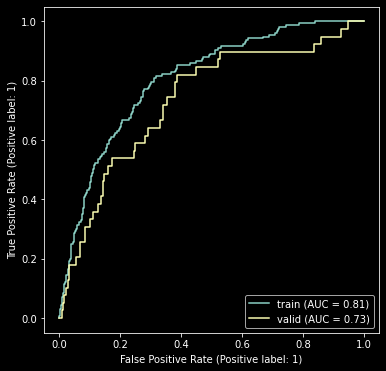

In [71]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [72]:
model_SVC = SVC(probability=True)
model_SVC.fit(x_train, y_train.to_numpy().ravel())

print(classification_report(y_valid, model_SVC.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       306
           1       0.00      0.00      0.00        39

    accuracy                           0.89       345
   macro avg       0.44      0.50      0.47       345
weighted avg       0.79      0.89      0.83       345



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


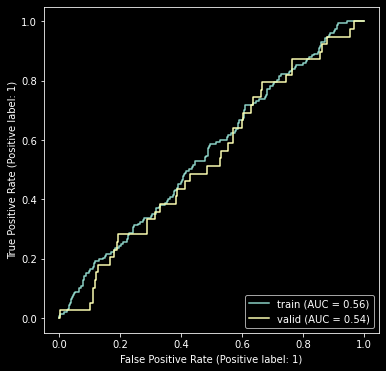

In [73]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_SVC.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_SVC.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [74]:
model_CBC = CatBoostClassifier(learning_rate=0.01, verbose=100, eval_metric='AUC')
model_CBC.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50)

0:	test: 0.6674627	best: 0.6674627 (0)	total: 51.4ms	remaining: 51.3s
100:	test: 0.7456846	best: 0.7502933 (73)	total: 418ms	remaining: 3.72s
200:	test: 0.7519692	best: 0.7558237 (156)	total: 793ms	remaining: 3.15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.755823697
bestIteration = 156

Shrink model to first 157 iterations.


In [75]:
print(classification_report(y_valid, model_CBC.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       306
           1       0.00      0.00      0.00        39

    accuracy                           0.89       345
   macro avg       0.44      0.50      0.47       345
weighted avg       0.79      0.89      0.83       345



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


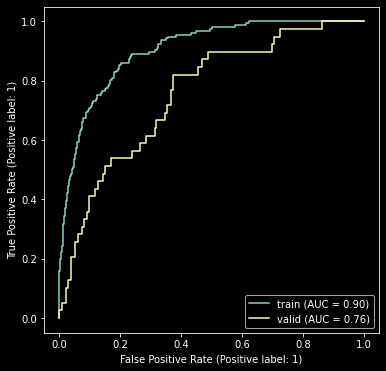

In [76]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBC.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBC.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

GridSearchCV

In [ ]:
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.001, 0.01, 1, 5]}
# params = {'solver': ['liblinear'], 'C':[1], 'penalty': ['l1']}

grid_search_cv = GridSearchCV(model_LR, params, verbose=False, cv=5, scoring='roc_auc', n_jobs=5)
grid_search_cv.fit(x_train, y_train.to_numpy().ravel())

print(grid_search_cv.best_params_)

In [78]:
model_LR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_LR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       306
           1       0.40      0.10      0.16        39

    accuracy                           0.88       345
   macro avg       0.65      0.54      0.55       345
weighted avg       0.84      0.88      0.85       345



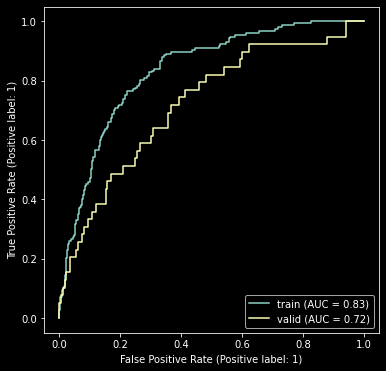

In [79]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [80]:
eli5.show_weights(model_LR_best, top=20, feature_names = x_train.columns.tolist())

In [ ]:
params = {'iterations': [500],
          'depth': [1, 3, 5],
          'loss_function': ['Logloss', 'CrossEntropy', 'AUC'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'logging_level':['Silent'],
          'random_seed': [42]}
          
grid_search_cv = GridSearchCV(estimator=CatBoostClassifier(), param_grid=params, verbose=False, scoring='roc_auc', cv=5, n_jobs=5)
grid_search_cv.fit(x_train, y_train)

print(grid_search_cv.best_params_)

In [82]:
model_CBR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_CBR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       306
           1       0.57      0.10      0.17        39

    accuracy                           0.89       345
   macro avg       0.73      0.55      0.56       345
weighted avg       0.86      0.89      0.85       345



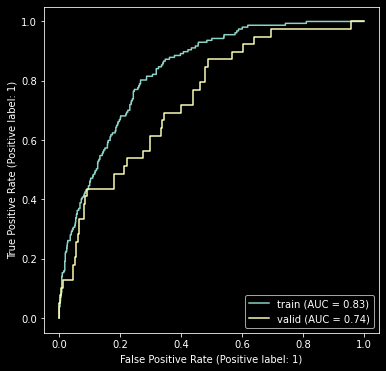

In [83]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [84]:
importances = model_CBR_best.feature_importances_
final_df = pd.DataFrame({'Признаки' : x_train.columns, 'Важность' : importances})
final_df.sort_values('Важность', ascending=False).head(10)

,Признаки,Важность
8,Тип товара Р,36.559618
23,Зарплата/Возраст,10.339507
10,Срок кредита Р,7.853154
2,Возраст клиента,6.683815
9,Образование клиента Р,5.236416
24,Сколько остается на жизнь,4.401236
99,"Доход клиента bin_(75000.0, 100000.0]",4.045849
7,Месяц выдачи кредита Р,3.004984
51,Тип товара_Мобильные телефоны,2.624881
1,Срок кредита,2.000508


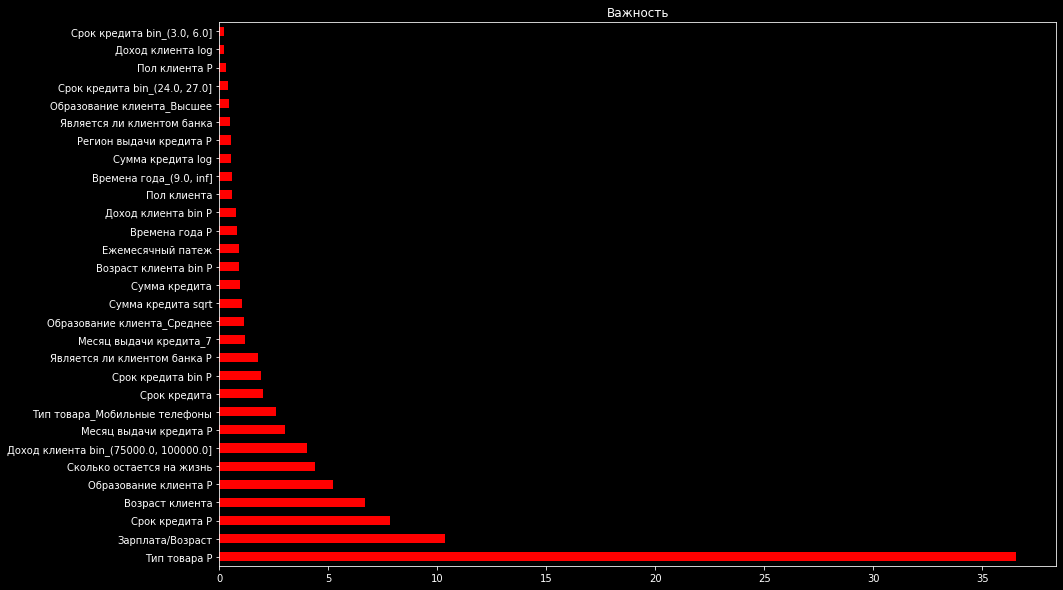

In [85]:
importances = model_CBR_best.feature_importances_
fig, ax = plt.subplots(figsize=(15,10))
feature_importances_cat = pd.Series(importances, index= x_train.columns)
feature_importances_cat.nlargest(30).plot(kind='barh', color='r', align='center')
plt.title('Важность');

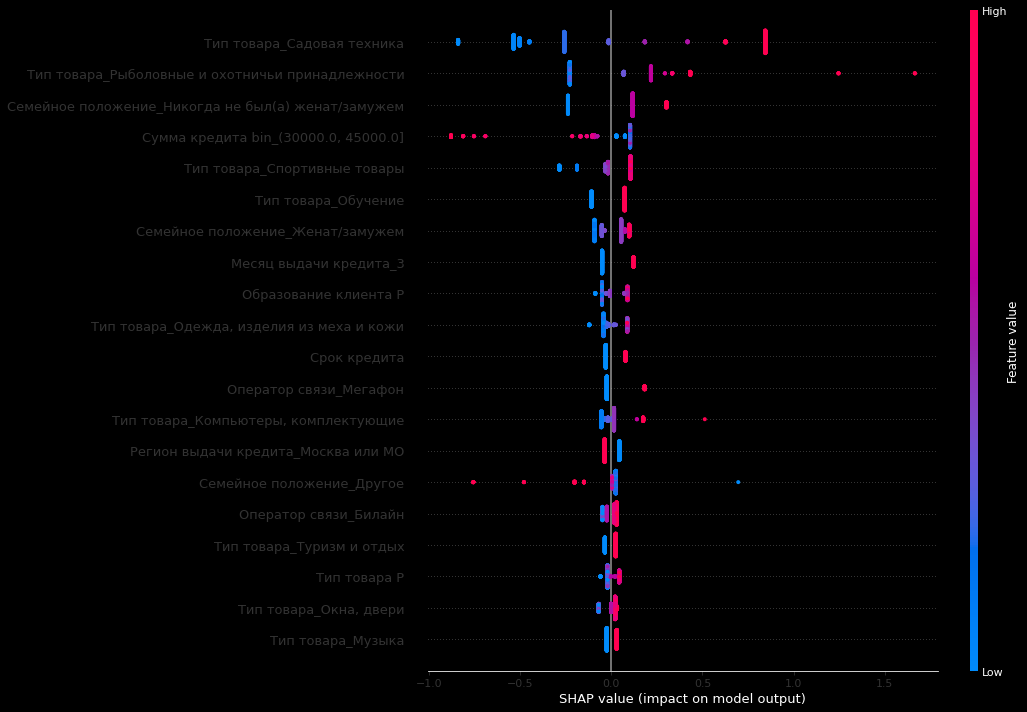

In [86]:
sorted_feature_importance = model_CBR_best.feature_importances_.argsort()
explainer = shap.TreeExplainer(model_CBR_best)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names = df.columns[sorted_feature_importance], plot_size=[15, 10]);

### Сэмплинг

In [87]:
from imblearn.over_sampling import SMOTE

# бороться с несбалансированностью буду с помощью увеличения числа экземпляров минорного класса. для этого выбран алгоритм smote семплинг
smt = SMOTE()
X_sm, Y_sm = smt.fit_resample(X, Y)

In [88]:
x_train, x_valid, y_train, y_valid = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((2443, 114), (611, 114), (2443,), (611,))

In [89]:
print(f'Количество строк в y_train по классам: {np.bincount(y_train)}')
print(f'Количество строк в y_valid по классам: {np.bincount(y_valid)}')

Количество строк в y_train по классам: [1222 1221]
Количество строк в y_valid по классам: [305 306]


In [90]:
sc = StandardScaler()
sc.fit(x_train[num_col])

x_train[num_col] = sc.transform(x_train[num_col])
x_valid[num_col] = sc.transform(x_valid[num_col])

### LogisticRegression, SVC, CatBoostClassifier

In [108]:
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(x_train, y_train.to_numpy().ravel())

print(classification_report(y_valid, model_LR.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       305
           1       0.96      0.87      0.91       306

    accuracy                           0.92       611
   macro avg       0.92      0.92      0.92       611
weighted avg       0.92      0.92      0.92       611



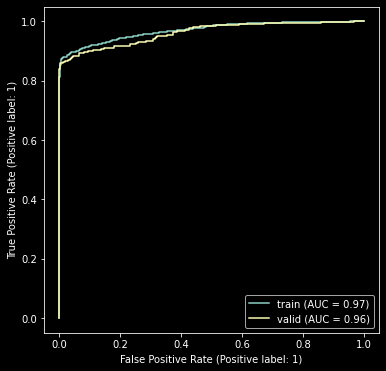

In [110]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR.predict_proba(x_valid)[:, 1],name='valid',ax=ax);
# fig.savefig('roc_auc.png')

In [93]:
model_CBC = CatBoostClassifier(learning_rate=0.01, verbose=100, eval_metric='AUC')
model_CBC.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=50)

0:	test: 0.8763634	best: 0.8763634 (0)	total: 15.2ms	remaining: 15.2s
100:	test: 0.9628094	best: 0.9628094 (100)	total: 913ms	remaining: 8.13s
200:	test: 0.9675774	best: 0.9676203 (198)	total: 1.8s	remaining: 7.15s
300:	test: 0.9697953	best: 0.9699239 (297)	total: 2.67s	remaining: 6.19s
400:	test: 0.9715847	best: 0.9715847 (400)	total: 3.53s	remaining: 5.27s
500:	test: 0.9727312	best: 0.9727312 (500)	total: 4.4s	remaining: 4.38s
600:	test: 0.9731812	best: 0.9732133 (550)	total: 5.24s	remaining: 3.48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.973213329
bestIteration = 550

Shrink model to first 551 iterations.


In [94]:
print(classification_report(y_valid, model_CBC.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       305
           1       0.99      0.90      0.94       306

    accuracy                           0.94       611
   macro avg       0.95      0.94      0.94       611
weighted avg       0.95      0.94      0.94       611



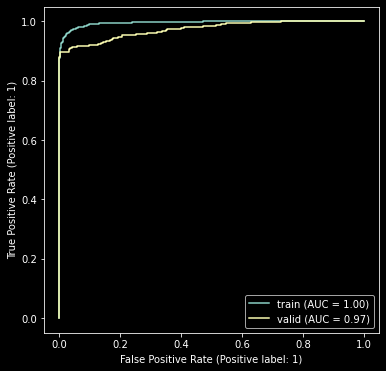

In [95]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBC.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBC.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

GridSearchCV

In [ ]:
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.001, 0.01, 1, 5]}
# params = {'solver': ['newton-cg'], 'C':[1], 'penalty': ['l2']}

grid_search_cv = GridSearchCV(model_LR, params, verbose=False, cv=5, scoring='roc_auc', n_jobs=5)
grid_search_cv.fit(x_train, y_train.to_numpy().ravel())

print(grid_search_cv.best_params_)

In [97]:
model_LR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_LR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       305
           1       0.99      0.87      0.92       306

    accuracy                           0.93       611
   macro avg       0.94      0.93      0.93       611
weighted avg       0.94      0.93      0.93       611



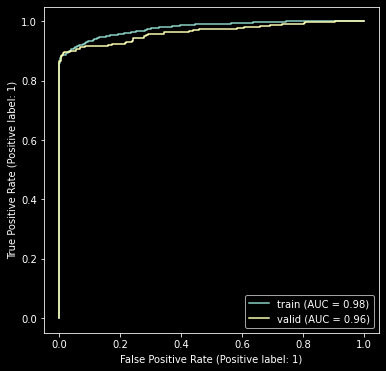

In [98]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_LR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_LR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [99]:
eli5.show_weights(model_LR_best, top=20, feature_names = x_train.columns.tolist())

In [ ]:
params = {'iterations': [500],
          'depth': [1, 3, 5],
          'loss_function': ['Logloss', 'CrossEntropy', 'AUC'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'logging_level':['Silent'],
          'random_seed': [42]}
          
grid_search_cv = GridSearchCV(estimator=CatBoostClassifier(), param_grid=params, verbose=False, scoring='roc_auc', cv=5, n_jobs=5)
grid_search_cv.fit(x_train, y_train)

print(grid_search_cv.best_params_)

In [101]:
model_CBR_best = grid_search_cv.best_estimator_
print(classification_report(y_valid, model_CBR_best.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       305
           1       0.99      0.88      0.93       306

    accuracy                           0.93       611
   macro avg       0.94      0.93      0.93       611
weighted avg       0.94      0.93      0.93       611



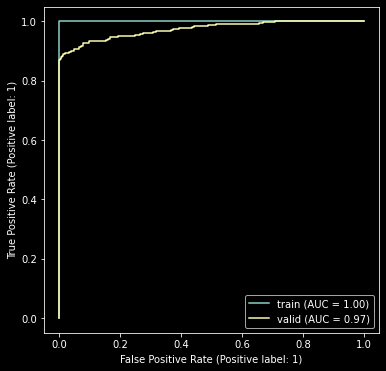

In [102]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, model_CBR_best.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, model_CBR_best.predict_proba(x_valid)[:, 1],name='valid',ax=ax);

In [103]:
importances = model_CBR_best.feature_importances_
final_df = pd.DataFrame({'Признаки' : x_train.columns, 'Важность' : importances})
final_df.sort_values('Важность', ascending=False).head(10)

,Признаки,Важность
11,Является ли клиентом банка Р,4.753659
8,Тип товара Р,4.750130
12,Пол клиента Р,3.604247
9,Образование клиента Р,3.408651
13,Наличие детей у клиента Р,3.227430
4,Наличие детей у клиента,2.915105
15,Семейное положение Р,2.780490
16,Оператор связи Р,2.725626
22,Ежемесячный патеж,2.594090
10,Срок кредита Р,2.532111


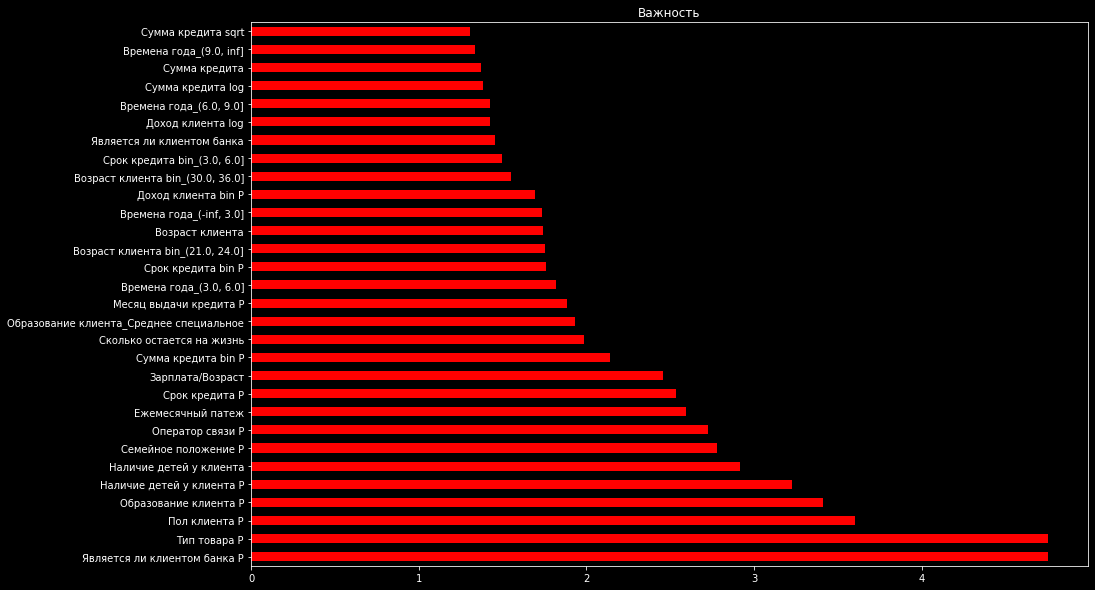

In [104]:
importances = model_CBR_best.feature_importances_
fig, ax = plt.subplots(figsize=(15,10))
feature_importances_cat = pd.Series(importances, index= x_train.columns)
feature_importances_cat.nlargest(30).plot(kind='barh', color='r', align='center')
plt.title('Важность');

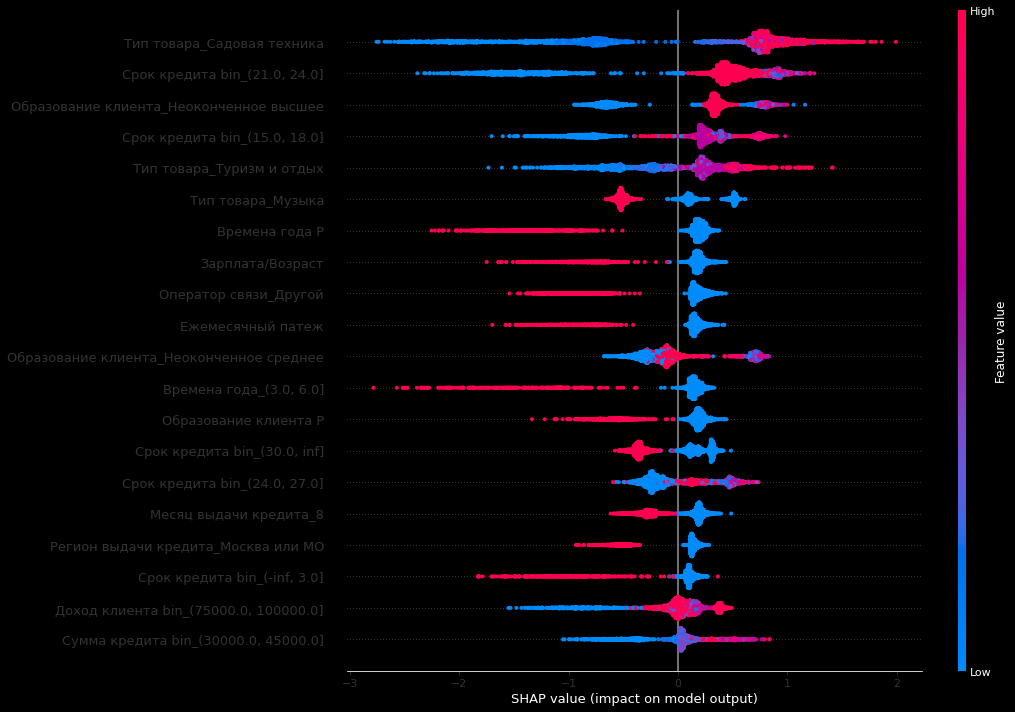

In [105]:
sorted_feature_importance = model_CBR_best.feature_importances_.argsort()
explainer = shap.TreeExplainer(model_CBR_best)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names = df.columns[sorted_feature_importance], plot_size=[15, 10]);

### Можно отобрать лучше фичи

In [ ]:
eli5.show_weights(model_LR_best, top=20, feature_names = x_train.columns.tolist())

In [ ]:
rfe_LR = RFE(model_LR_best, n_features_to_select=13)
rfe_LR.fit(x_train, y_train.to_numpy().ravel())

RFE(estimator=LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                 solver='liblinear'),
    n_features_to_select=13)

In [ ]:
print(classification_report(y_valid, rfe_LR.predict(x_valid)))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74       305
           1       0.73      0.79      0.76       306

    accuracy                           0.75       611
   macro avg       0.75      0.75      0.75       611
weighted avg       0.75      0.75      0.75       611



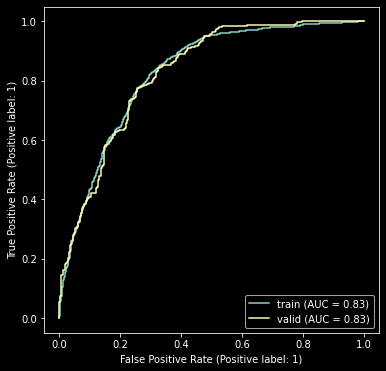

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_predictions(y_train, rfe_LR.predict_proba(x_train)[:, 1],name='train',ax=ax)
RocCurveDisplay.from_predictions(y_valid, rfe_LR.predict_proba(x_valid)[:, 1],name='valid',ax=ax);